In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

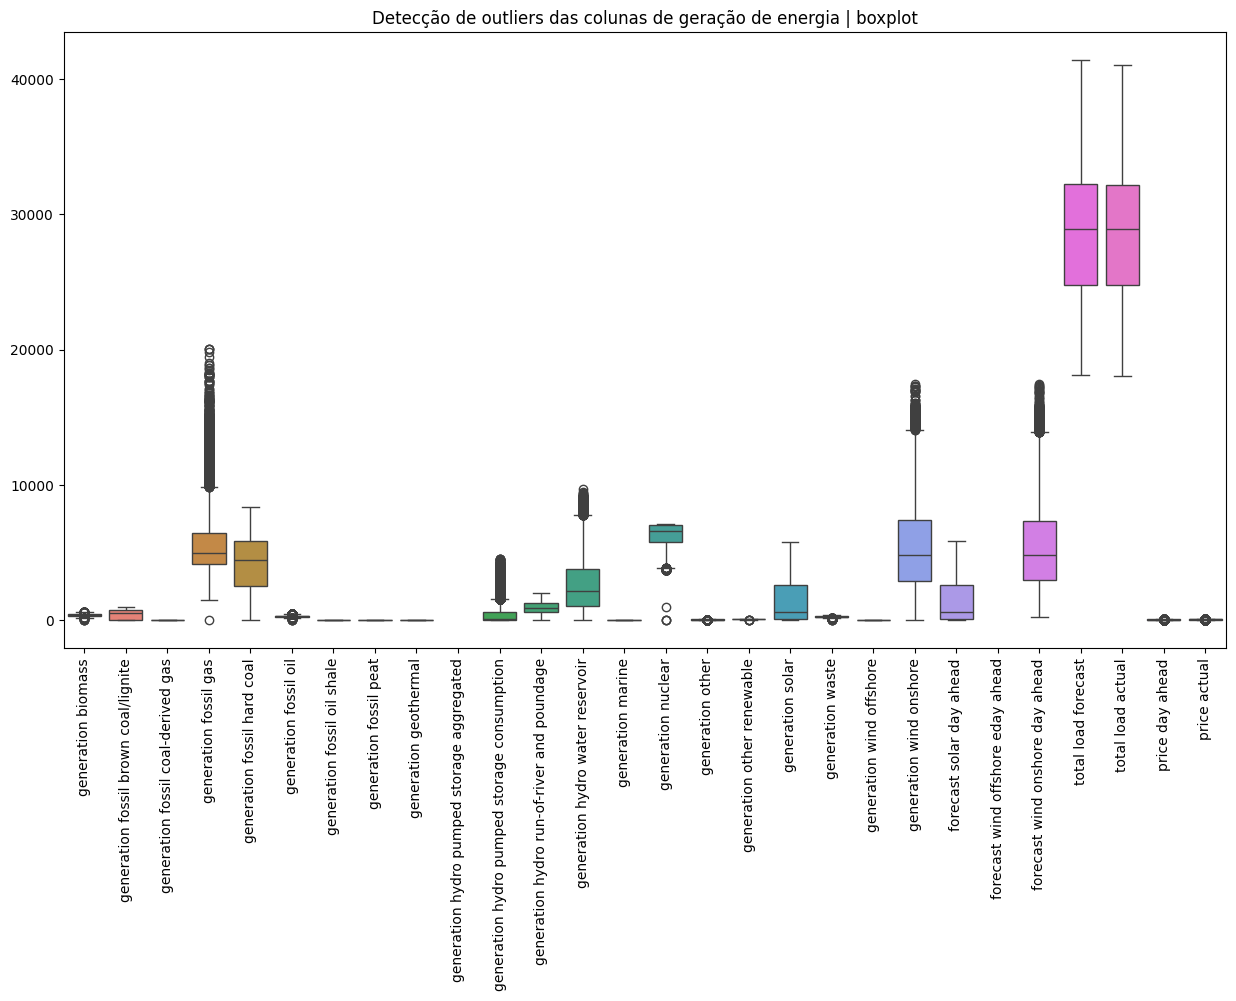

                            time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  generation fossil gas  \
0                                     329.0                 4844.0   
1                                     328.0                 5196.0   
2                                     323.0                 4857.0   
3                                     254.0    

C:\Users\Micro\AppData\Local\Temp\ipykernel_1396\1272579028.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ausentes.index, y=ausentes.values, palette='viridis')


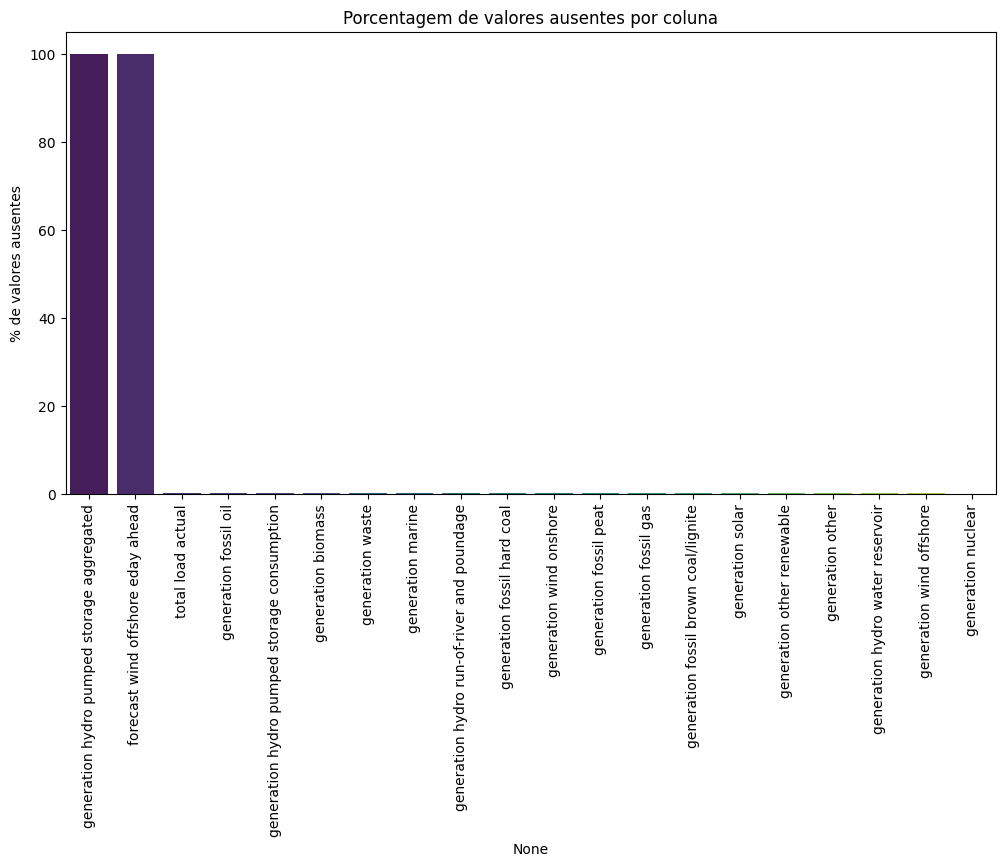

Colunas removidas: ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead']


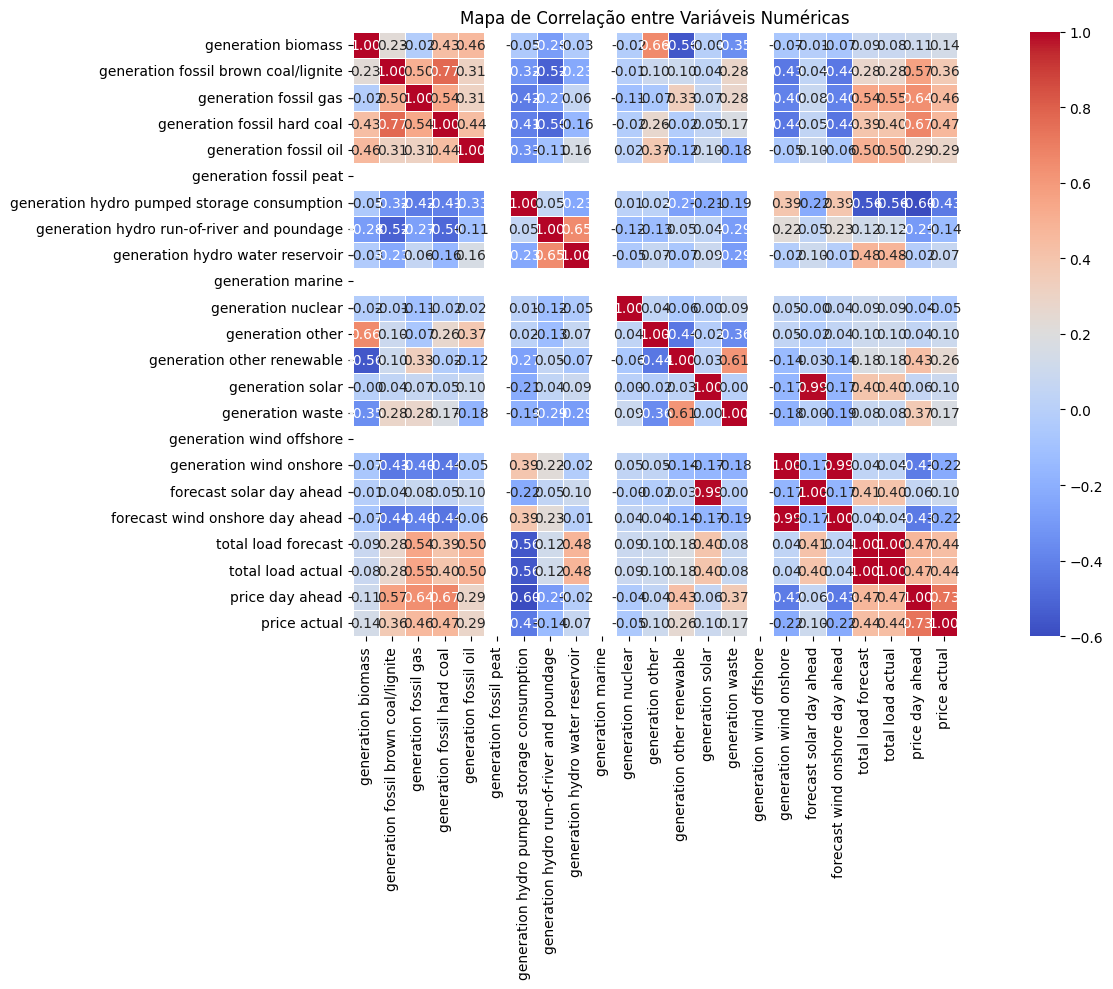

In [18]:
# Tratamento de dados através de Pandas, ao invés do Power Query

df1 = pd.read_csv('../data/energy_dataset.csv')
df2 = pd.read_csv('../data/weather_features.csv')

df1.head()
df1.drop(columns = 'time').describe()

num_cols = df1.drop(columns = 'time').select_dtypes(include = 'number')

# Detectar presença de outliers através de um boxplot
plt.figure(figsize = (15, 8))
sns.boxplot(data = num_cols)
plt.xticks(rotation = 90)
plt.title("Detecção de outliers das colunas de geração de energia | boxplot")
plt.show()

# Retirar as colunas de geothermal, gen. fossil oil shale e coal derived gas por não terem dados compatíveis com a análise
novo_df1 = df1.drop(columns = ['generation fossil oil shale', 'generation geothermal', 'generation fossil coal-derived gas'])
print(novo_df1)

# Porcentagem de valores ausentes 
valores_ausentes = novo_df1.isnull().mean().sort_values(ascending = False) * 100
ausentes = valores_ausentes[valores_ausentes > 0]

# Plotagem do gráfico de barras com Seaborn (seaborn.barplot)
plt.figure(figsize=(12, 6))
sns.barplot(x=ausentes.index, y=ausentes.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Porcentagem de valores ausentes por coluna')
plt.ylabel('% de valores ausentes')
plt.show()

# Parâmetro de remoção (mais de 30% dados ausentes)
limiar = 0.3 
colunas_removidas = valores_ausentes[valores_ausentes > limiar * 100].index.tolist()
novo_df1 = novo_df1.drop(columns = colunas_removidas)
print(f"Colunas removidas: {colunas_removidas}")

# Preencher as outras colunas com interpolação temporal
novo_df1['time'] = pd.to_datetime(novo_df1['time'], utc = True)
novo_df1 = novo_df1.set_index('time')
novo_df1 = novo_df1.interpolate(method='time')

# Garantir que só vai analisar colunas numéricas
df_corr = novo_df1.select_dtypes(include='number')

# Matriz de correlação
corr_matrix = df_corr.corr()

# Gerar heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()